# **Assessment 1**

For our first assessment, our goal is to solve an imputation problem: we will create a neural network architecture that learns how to recover missing portions of an image.

This is an important problem in magnetic resonance imaging (MRI), where patient scans are often limited to a few areas to avoid lengthy scanning times.

In particular, we are going to focus on images of human heads. We have managed to gain access to one hundred images of patient's heads but, unfortunately, these images have a significant portion of missing information. Your goal during the assessment is to design a neural network that can recover these missing portions.

<br>

---

<br>

We do not have access to the labels for the images we want to recover, so we will have to be a bit creative to obtain a workable dataset on which to train our neural network.

Fortunately for us, we have access to a generative model that has been trained to produce realistic-looking MRI images of patient's heads. Using this model, you will create an appropriate dataset to train your architecture. We have provided you with the basic setup code to start using this generative model in **Question 1** below.

The corrupted images that we want to recover are contained in the numpy file `test_set.npy` of this repository. The file contains 100 patient images with a size of 64x64 pixels.

The architecture that you design in this assessment should use the artificially-generated dataset in order to recover the missing information in the images contained in `test_set.npy`.

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Using the provided image-generation network, create a dataset of brain images that will later be used to train your chosen architecture.

Given that you will likely want to use this dataset multiple times during training, we recommend that you save the generated images to an appropriate folder in your GDrive.

Once you have generated your dataset, load and display ten of your generated images here.

We have also provided you with some corrupted images in the file `test_set.npy` of this repository. You should also load and display ten of these corrupted images here.

Below, we have provided template code, including some required downloads and installations, so that you can easily use the trained generative model. Sample generation in this model is done using the function `generate`, and is controlled by some input arguments. It is your job to figure out a sensible set of parameters that will produce images that are useful for the requirements of your task.

<br>

In [ ]:
import os
import sys
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Cuda installed! Running on GPU!


In [ ]:
# Pull and install necessary files
# !gdown 1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY # run.sh
# !gdown --folder 1-PJmUzB9HN3mCKsl7qKGlUynltY5ttp7 # ese-invldm
# !gdown --folder 1-V9EOGuiYOiszIg3pA15D9ThwXO1gr4E # files
# !chmod +x run.sh
# !bash ./run.sh
# sys.path.append('/content/ese-invldm')


Downloading...
From (original): https://drive.google.com/uc?id=1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY
From (redirected): https://drive.google.com/uc?id=1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY&confirm=t&uuid=99e5d1d4-3953-429f-9a82-6a164e1f58fa
To: /content/run.sh
100% 530/530 [00:00<00:00, 2.17MB/s]
Retrieving folder contents
Retrieving folder 1Kc3TJ6yXVM6ugT_i4OBX5yH0Bf_oTYas ese_invldm
Processing file 1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG __init__.py
Processing file 1IjiAQ0hqDfpqYxh4zSKEfsAh7iV8226i ese_invldm.py
Processing file 1JlBHxSRrEUewrHmGcf4S8hh02Sz-xT66 setup.py
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG
From (redirected): https://drive.google.com/uc?id=1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG&confirm=t&uuid=08b280b5-26b7-4726-820a-367977e1453d
To: /content/ese-invldm/ese_invldm/__init__.py
100% 32.0/32.0 [00:00<00:00, 155kB/s]
Downloading.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/cw1_files.zip -d ./
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Archive:  /content/gdrive/MyDrive/cw1_files.zip
  inflating: ./files/config_training.yml  
  inflating: ./run.sh                
  inflating: ./ese-invldm/setup.py   
  inflating: ./files/default_config.yml  
  inflating: ./ese-invldm/ese_invldm/ese_invldm.py  
  inflating: ./ese-invldm/ese_invldm/__init__.py  
  inflating: ./files/autoencoder/autoencoder_ckpt_latest.pth  
  inflating: ./files/diffusion/diffusion_ckpt_latest.pth  
Cloning the repository from https://github.com/dpelacani/InverseLDM.git...
Cloning into 'InverseLDM'...
remote: Enumerating objects: 1331, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 1331 (delta 167), reused 182 (delta 100), pack-reused 1070 (from 1)
Receiving objects: 100% (1331/1331), 467.16 KiB | 3.36 MiB/s, done.
Resolving deltas: 100% (875/875), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━

load the corrupted dataser

In [ ]:
import numpy as np
path = "/content/gdrive/My Drive/test_set.npy"
data = np.load(path)
print(data.shape)

(100, 1, 64, 64)


Plot ten of the corrupted images

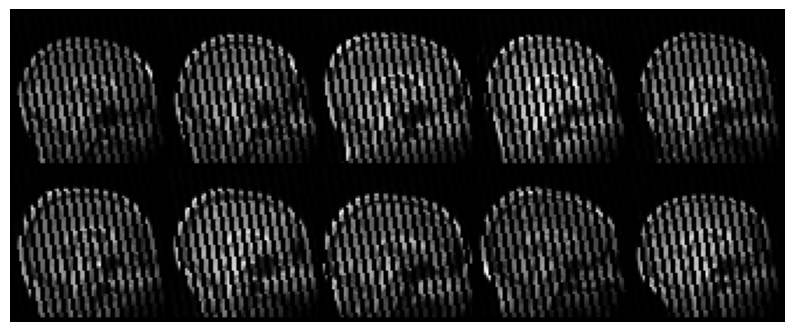

In [ ]:
from torchvision.utils import make_grid
import torch
import matplotlib.pyplot as plt

data_tensor = torch.tensor(data)
first_10_images = data_tensor[:10]
grid = make_grid(first_10_images, nrow=5, normalize=True, value_range=(0, 1))

plt.figure(figsize=(10, 5))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.show()

generated dataset

In [ ]:
from ese_invldm import generate
"""
Generates samples using a diffusion-based generative model.

This function leverages a pre-configured diffusion model to produce synthetic samples.
The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
A scheduler and temperature can also be configured to control the sampling behaviour.

Parameters:
    num_samples (int):
        Total number of samples to generate.
    num_inference_steps (int):
        Number of diffusion inference steps.
        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
        Please note that more steps will increase quality but also the computational cost. Be careful not
        to burn through your credits by using a very large number of steps!
    batch_size (int):
        Number of samples to process in each batch during sampling.
    scheduler (str, optional):
        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
        for this task.
    temperature (float, optional):
        Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
    seed (int, optional):
        Random seed for reproducibility. Defaults to 42.

Returns:
    list:
        A list containing the batches of generated samples, where each sample
        corresponds to a single data instance produced by the diffusion model.

"""

samples = generate(num_samples=500,
    num_inference_steps=35,
    batch_size=32,
    scheduler="ddim",
    temperature=0.8,
    seed=42)


/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/content/InverseLDM/invldm/runners/base_runner.py:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. T

Batch 0


100%|██████████| 35/35 [00:09<00:00,  3.73it/s]


Batch 1


100%|██████████| 35/35 [00:09<00:00,  3.74it/s]


Batch 2


100%|██████████| 35/35 [00:09<00:00,  3.74it/s]


Batch 3


100%|██████████| 35/35 [00:09<00:00,  3.75it/s]


Batch 4


100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


Batch 5


100%|██████████| 35/35 [00:09<00:00,  3.77it/s]


Batch 6


100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


Batch 7


100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


Batch 8


100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


Batch 9


100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


Batch 10


100%|██████████| 35/35 [00:09<00:00,  3.75it/s]


Batch 11


100%|██████████| 35/35 [00:09<00:00,  3.75it/s]


Batch 12


100%|██████████| 35/35 [00:09<00:00,  3.75it/s]


Batch 13


100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


Batch 14


100%|██████████| 35/35 [00:09<00:00,  3.76it/s]


Batch 15


100%|██████████| 35/35 [00:05<00:00,  6.08it/s]


check the data

In [ ]:
print(print("Length of samples:", len(samples)))

Length of samples: 16
None


In [ ]:
samples[1].shape

torch.Size([32, 1, 64, 64])

In [ ]:
samples[0][0]

tensor([[[0.0154, 0.0139, 0.0143,  ..., 0.0132, 0.0129, 0.0118],
         [0.0167, 0.0162, 0.0155,  ..., 0.0157, 0.0177, 0.0131],
         [0.0179, 0.0172, 0.0163,  ..., 0.0150, 0.0167, 0.0128],
         ...,
         [0.0132, 0.0148, 0.0153,  ..., 0.0249, 0.0191, 0.0140],
         [0.0141, 0.0150, 0.0153,  ..., 0.0284, 0.0202, 0.0161],
         [0.0140, 0.0143, 0.0142,  ..., 0.0220, 0.0186, 0.0199]]],
       device='cuda:0', dtype=torch.float16)

In [ ]:
all_images = torch.cat(samples, dim=0)
print("Shape of all_images:", all_images.shape)

Shape of all_images: torch.Size([500, 1, 64, 64])


plot the generated dataset

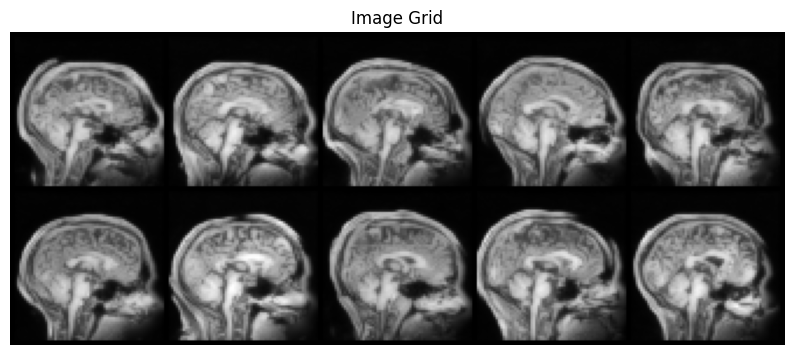

In [ ]:
batch0 = samples[0].cpu()
batch0 = batch0[:10]

grid = make_grid(batch0, nrow=5, normalize=True)

grid = grid.permute(1, 2, 0).cpu().numpy().astype("float32")

plt.figure(figsize=(10, 5))
plt.imshow(grid)
plt.axis("off")
plt.title("Image Grid")
plt.show()

save the generated datasert

In [ ]:
samples = torch.cat(samples,dim = 0)
samples.shape

torch.Size([500, 1, 64, 64])

In [ ]:
samples_cpu = [sample.cpu().numpy() for sample in samples]
samples_array = np.stack(samples_cpu, axis=0)

sample_save_name = 'train_set_500.npy'
path = F"/content/gdrive/My Drive/generated_images/{sample_save_name}"
np.save(path, samples_array)

check the dataset

In [ ]:
import numpy as np
data = np.load(path)
print(data.shape)

(500, 1, 64, 64)


In [ ]:
data[1][0]

array([[0.01575 , 0.01469 , 0.01474 , ..., 0.013855, 0.01528 , 0.01391 ],
       [0.01872 , 0.01736 , 0.01607 , ..., 0.01736 , 0.01958 , 0.01556 ],
       [0.01822 , 0.01952 , 0.01953 , ..., 0.01875 , 0.01863 , 0.014915],
       ...,
       [0.01557 , 0.0173  , 0.01678 , ..., 0.02165 , 0.02232 , 0.01724 ],
       [0.01701 , 0.0178  , 0.01675 , ..., 0.02112 , 0.01942 , 0.01697 ],
       [0.01692 , 0.01505 , 0.01505 , ..., 0.02    , 0.01842 , 0.01656 ]],
      dtype=float16)

<br>

---

<br>

## **Question 2**  (25%)

Using the data generated in **Question 1**, create a PyTorch `TensorDataset` and a `DataLoader` for the training set.

Using the provided corrupted images inside `test_set.npy`, create another `TensorDataset` and a `DataLoader` for the test set.

The training dataset should provide batches of brain images generated in **Question 1** and should corrupt these images appropriately so that they resemble images in the test set. The dataset should also pair each image with its corresponding un-corrupted image as a label.

The test dataset should provide the corrupted images provided, for which no labels are available.

Display here ten images of your training dataset and ten images of your test dataset, and their corresponding labels when available.

<br>



load the dataset

In [ ]:
generate_path = "/content/gdrive/MyDrive/generated_images/train_set_500.npy"
test_path = "/content/gdrive/My Drive/test_set.npy"

In [ ]:
train_data = np.load(generate_path)
test_data = np.load(test_path)
print(train_data.shape)
print(test_data.shape)

(500, 1, 64, 64)
(100, 1, 64, 64)


In [ ]:
train_tensor = torch.tensor(train_data).float()
test_tensor = torch.tensor(test_data).float()

In [ ]:
print(test_tensor[0].squeeze(0).shape)

torch.Size([64, 64])


get intersection corrupted area from 100 images

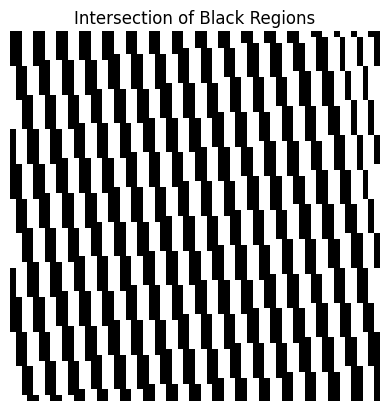

In [ ]:
# initial status
images = test_tensor.squeeze()
intersection = torch.ones_like(images[0], dtype=torch.bool)

# extract black space from 100 imaged
for image in images:
    black_region = (image == 0)
    intersection = intersection & black_region

intersection = intersection.to(torch.uint8)

# plot the intersection
plt.imshow(intersection.numpy(), cmap='gray')
plt.axis('off')
plt.title("Intersection of Black Regions")
plt.show()

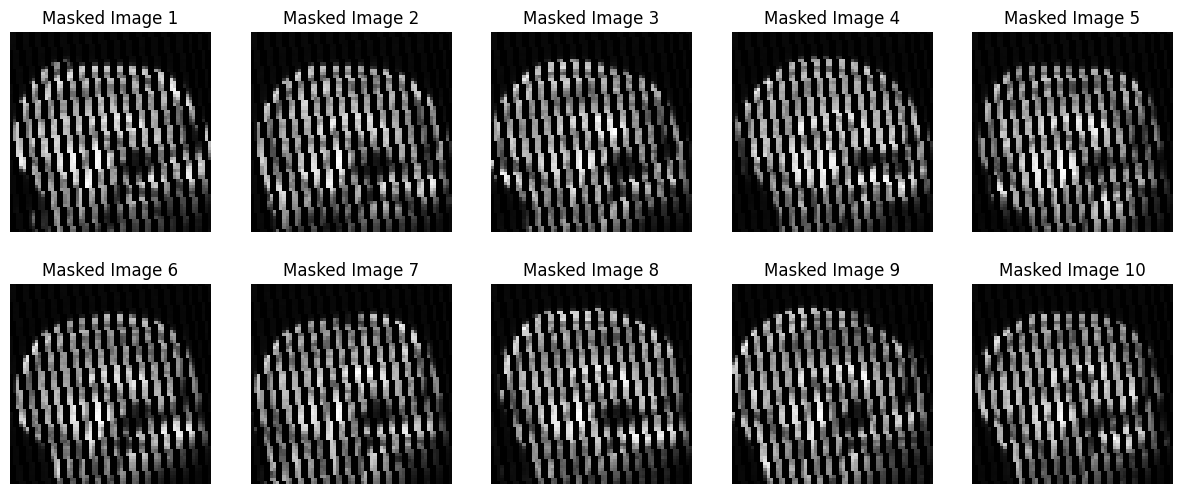

In [ ]:
# translate to boolean
intersection_bool = intersection.bool()

train_tensor_expanded = train_tensor.squeeze(1)

# mask train dataset
masked_train_set = train_tensor_expanded.clone()  # clone
masked_train_set[:, intersection_bool] = 0  # set intersection to 0

plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(masked_train_set[i].cpu().numpy(), cmap='gray')
    plt.title(f"Masked Image {i+1}")
    plt.axis("off")

plt.show()

plot train dataset

In [ ]:
train_tensor_expanded = train_tensor_expanded.unsqueeze(1)
masked_train_set = masked_train_set.unsqueeze(1)
masked_train_set.shape

torch.Size([500, 1, 64, 64])

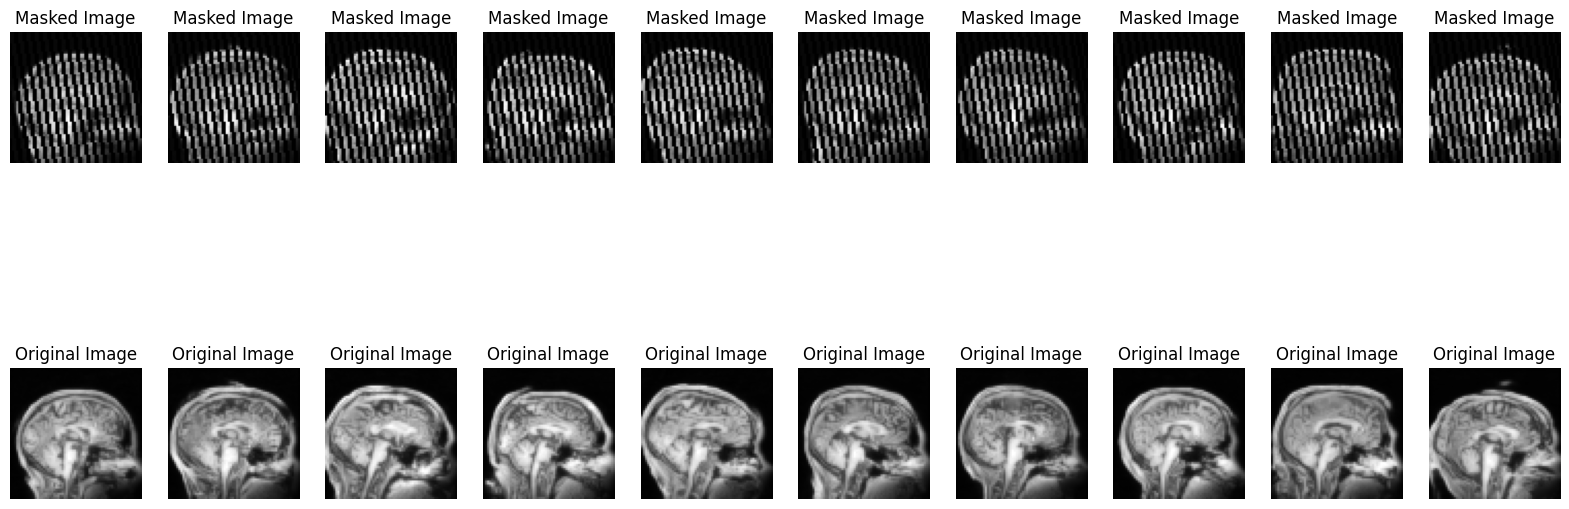

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms

# TensorDataset
train_dataset = TensorDataset(masked_train_set, train_tensor_expanded)

# DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

data_iter = iter(train_loader)
masked_image, original_image = next(data_iter)

# plot 10 images
plt.figure(figsize=(20, 8))
for i in range(10):
    # corrupted images
    plt.subplot(2, 10, i + 1)
    plt.imshow(masked_image[i].squeeze(0).cpu().numpy(), cmap='gray')
    plt.title("Masked Image")
    plt.axis("off")

    # origin images
    plt.subplot(2, 10, i + 11)
    plt.imshow(original_image[i].squeeze(0).cpu().numpy(), cmap='gray')
    plt.title("Original Image")
    plt.axis("off")


plt.show()


In [ ]:
data, label = train_dataset.tensors
data.shape

torch.Size([500, 1, 64, 64])

plot test dataset

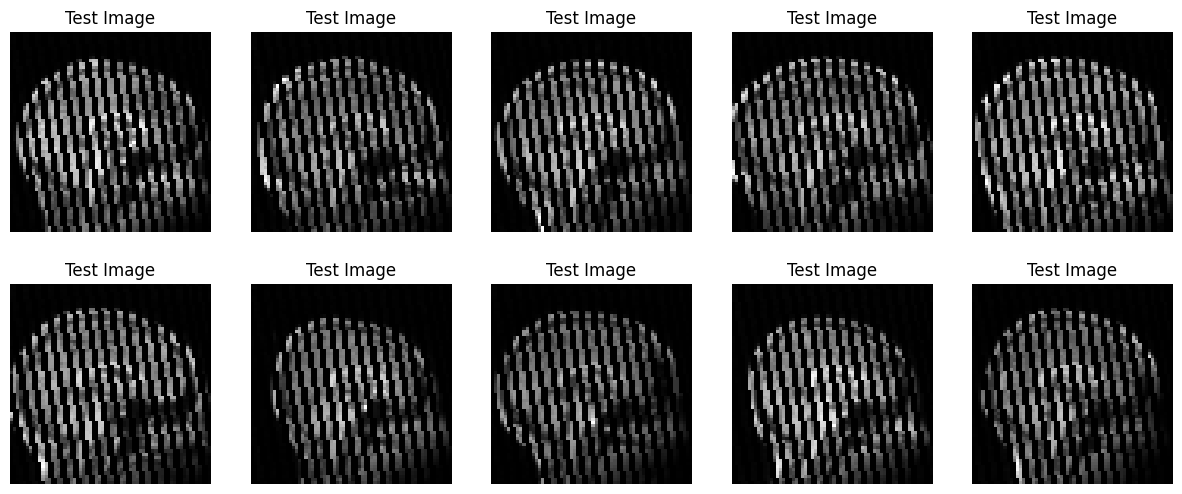

In [ ]:
batch_size = 64
test_dataset = TensorDataset(test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

data_iter = iter(test_loader)
test_images = next(data_iter)[0]

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].squeeze(0).cpu().numpy(), cmap='gray')
    plt.title("Test Image")
    plt.axis("off")

plt.show()


<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing image lines of the provided test dataset.

Once you have trained your architecture, display here ten images of the test set with the recovered lines filled in.

Additionally, save the test data with the missing values filled in into a numpy file called `test_set_nogaps.npy`. These images should be **in the same order** as those in the `test_set.npy` file and should have the same pixel size of 64x64. **Any images not contained in the `test_set_nogaps.npy` file or incorrectly ordered will not be marked.**

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


In [ ]:
class ConvBlock(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv = nn.Conv2d(in_c, out_c, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(out_c)
        self.act = nn.SiLU()
        # self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        # x = self.dropout(x)
        return x

class EncBlock(nn.Module):
    """time-conditioned U-Net encoder block"""

    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv_block1 = ConvBlock(in_c, out_c)
        self.conv_block2 = ConvBlock(out_c, out_c)
        self.pool = nn.MaxPool2d((2, 2))
        # self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        h = self.conv_block1(x)
        h = self.conv_block2(h)
        # h = self.dropout(h)
        p = self.pool(h)
        return h, p

class DecBlock(nn.Module):
    """time-conditioned U-Net decoder block"""

    def __init__(self, in_c, out_c):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_c, out_c, kernel_size=2, stride=2, padding=0)
        self.conv_block1 = ConvBlock(out_c+out_c, out_c)
        self.conv_block2 = ConvBlock(out_c, out_c)
        # self.dropout = nn.Dropout(p=0.5)

    def forward(self, x, s):
        h = self.up(x)
        h = torch.cat([h, s], axis=1) # concatenate x with U-Net skip connection from encoder
        h = self.conv_block1(h)
        h = self.conv_block2(h)
        # h = self.dropout(h)
        return h

In [ ]:
class Unet(nn.Module):

    def __init__(self, n_channels):
        super().__init__()

        # encoder
        self.e1 = EncBlock(n_channels, 64)
        self.e2 = EncBlock(64, 128)
        self.e3 = EncBlock(128, 256)
        self.e4 = EncBlock(256, 512)

        # bottleneck
        self.b1 = ConvBlock(512, 1024)
        self.b2 = ConvBlock(1024, 1024)

        # decoder
        self.d1 = DecBlock(1024, 512)
        self.d2 = DecBlock(512, 256)
        self.d3 = DecBlock(256, 128)
        self.d4 = DecBlock(128, 64)

        # output layer
        self.output = nn.Conv2d(64, n_channels, kernel_size=1, padding=0)

    def forward(self, x):

        # encoder
        s1, x = self.e1(x)
        s2, x = self.e2(x)
        s3, x = self.e3(x)
        s4, x = self.e4(x)

        # bottleneck
        x = self.b1(x)
        x = self.b2(x)

        # decoder
        x = self.d1(x, s4)
        x = self.d2(x, s3)
        x = self.d3(x, s2)
        x = self.d4(x, s1)

        # output
        output = self.output(x)
        return output

define the model

In [ ]:
import torch.nn.functional as F
import torch.optim as optim

model = Unet(n_channels=1)
model = model.to(device)

# optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

train and valid

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

def train(model, optimizer, criterion, data_loader):
  model.train()
  train_loss = 0.0
  for inputs, targets in data_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      loss.backward()
      optimizer.step()
      train_loss += loss*inputs.size(0)
      # train_loss += loss.item()
  train_loss = train_loss / len(data_loader.dataset)
  return train_loss


In [ ]:
def valid(model, criterion, data_loader):
    model.eval()
    valid_loss = 0.
    with torch.no_grad():
        for input, target in data_loader:
            input, target = input.to(device), target.to(device)
            output = model(input)
            loss = criterion(output, target)
            valid_loss += loss*input.size(0)
            # valid_loss += loss.item()
        valid_loss = valid_loss / len(data_loader.dataset)
        return valid_loss

In [ ]:
data, labels = train_dataset.tensors
data.shape

torch.Size([500, 1, 64, 64])

split train dataset and valid dataset

In [ ]:
from torch.utils.data import random_split

dataset_size = len(train_dataset)
train_size = int(0.8 * dataset_size)
valid_size = dataset_size - train_size

# random_split
train_dataset_01, valid_dataset_01 = random_split(train_dataset, [train_size, valid_size])

In [ ]:
batch_size = 64
train_loader_01 = torch.utils.data.DataLoader(dataset=train_dataset_01, batch_size=batch_size, shuffle=True)
valid_loader_01 = torch.utils.data.DataLoader(dataset=valid_dataset_01, batch_size=1000, shuffle=False)

In [ ]:
!pip install livelossplot

In [ ]:
data, labels = train_dataset_01.dataset.tensors
subset_data = data[train_dataset_01.indices]
print(subset_data.shape)

torch.Size([400, 1, 64, 64])


In [ ]:
data, labels = valid_dataset_01.dataset.tensors
subset_data = data[valid_dataset_01.indices]
print(subset_data.shape)

torch.Size([100, 1, 64, 64])


train the model

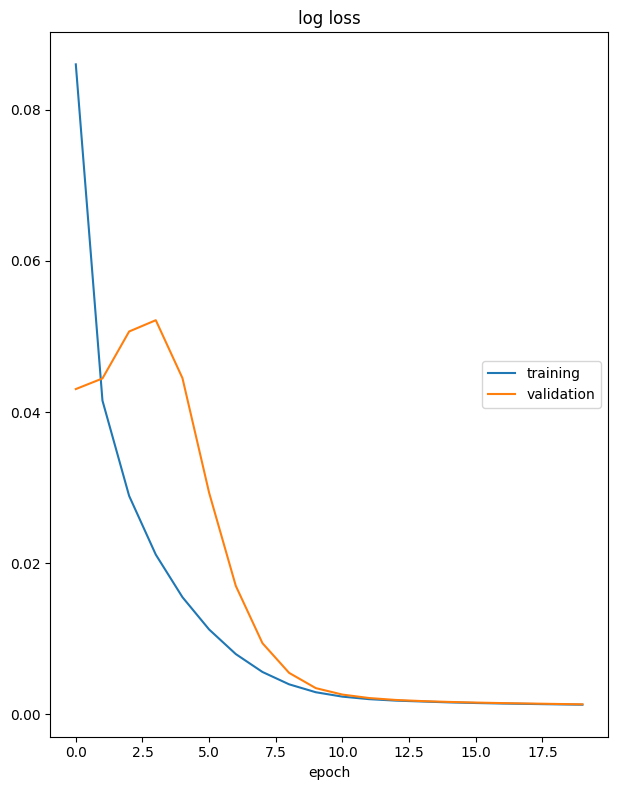

log loss
	training         	 (min:    0.001, max:    0.086, cur:    0.001)
	validation       	 (min:    0.001, max:    0.052, cur:    0.001)


In [ ]:
from livelossplot import PlotLosses

liveloss = PlotLosses()
n_epochs = 20

for i in range(n_epochs):
    train_loss = train(model, optimizer, criterion, train_loader_01)
    valid_loss = valid(model, criterion, valid_loader_01)
    print(f'Epoch {i+1}/{n_epochs} | Train Loss: {train_loss:.4f} | Valid Loss: {valid_loss:.4f}')


    logs = {}
    logs['' + 'log loss'] = train_loss.item()
    logs['val_' + 'log loss'] = valid_loss.item()

    # 打印损失
    # print(f'Epoch {i+1}/{n_epochs} | Train Loss: {train_loss:.4f} | Valid Loss: {valid_loss:.4f}')

    # 更新 logs
    # logs = {}
    # logs['log loss'] = train_loss
    # logs['val_log loss'] = valid_loss


    liveloss.update(logs)
    liveloss.draw()

In [ ]:
model_save_name = 'model_500_15.pth'
path = F"/content/gdrive/My Drive/generated_images/{model_save_name}"

torch.save(model.state_dict(), path)


In [ ]:
model_save_name = 'model_3000_15.pth'
path = F"/content/gdrive/My Drive/generated_images/{model_save_name}"

model = Unet(n_channels=1)
model.load_state_dict(torch.load(path))
model = model.to(device)
model.eval()

<ipython-input-351-abdd985b0e8e>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


Unet(
  (e1): EncBlock(
    (conv_block1): ConvBlock(
      (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (conv_block2): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (e2): EncBlock(
    (conv_block1): ConvBlock(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (conv_block2): ConvBlock(
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine

In [ ]:
inputs, targets = next(iter(valid_loader_01))
first_image = inputs[0]
inputs.shape

torch.Size([600, 1, 64, 64])

plot the result

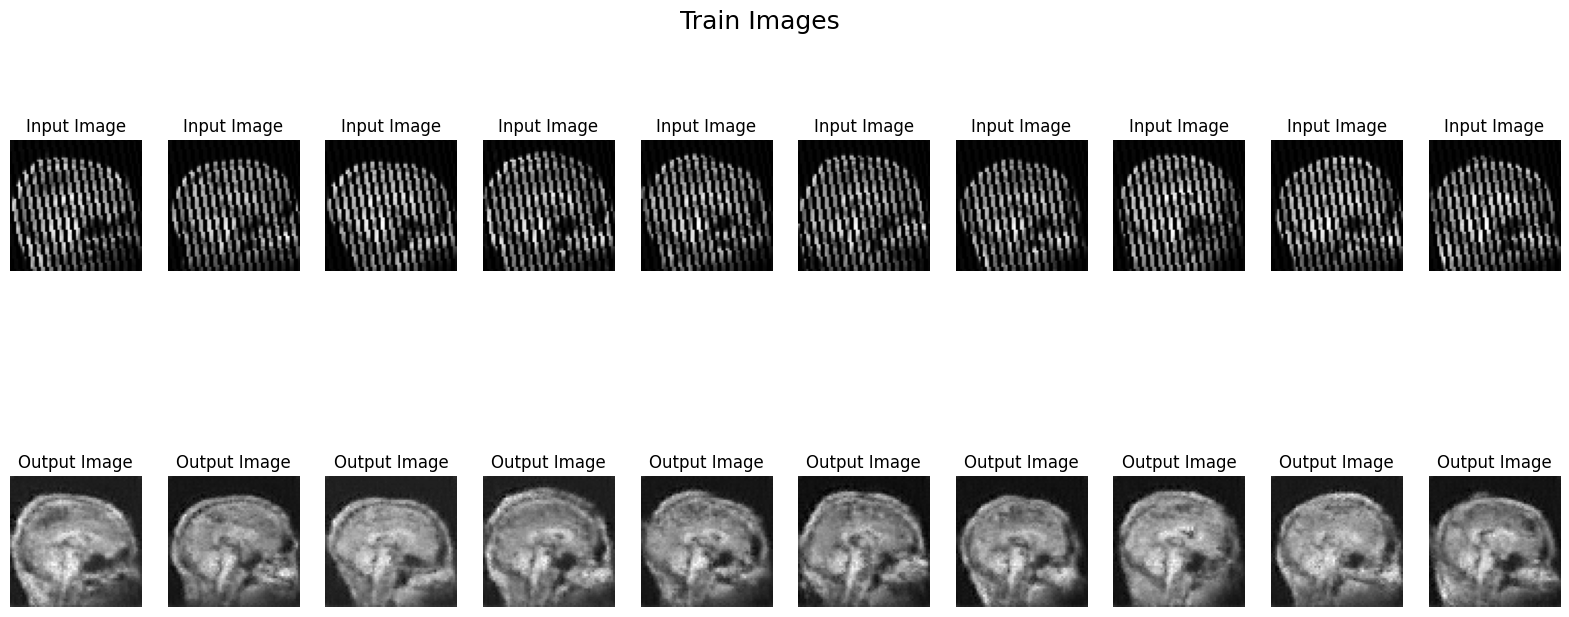

In [ ]:
model.eval()

inputs, targets = next(iter(valid_loader_01))
valid_target = model(inputs.to(device))

# plot 10 images
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(inputs[i].squeeze(0).cpu().numpy(), cmap='gray')
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(2, 10, i + 11)
    plt.imshow(valid_target[i].squeeze(0).cpu().detach().numpy(), cmap='gray')
    plt.title("Output Image")
    plt.axis("off")

plt.suptitle("Train Images", fontsize=18, y=0.95)
plt.show()

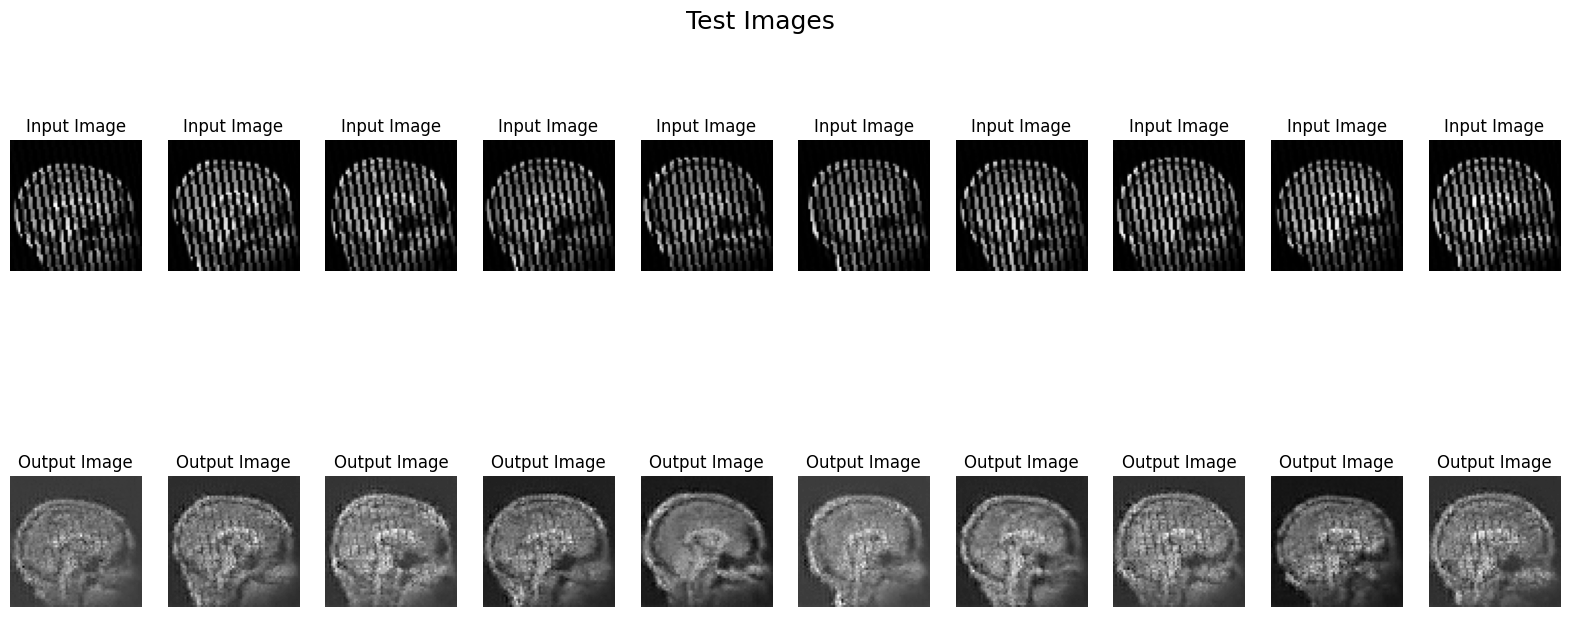

In [ ]:
model.eval()

inputs = next(iter(test_loader))[0]
valid_target = model(inputs.to(device))
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(inputs[i].squeeze(0).cpu().numpy(), cmap='gray')
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(2, 10, i + 11)
    plt.imshow(valid_target[i].squeeze(0).cpu().detach().numpy(), cmap='gray')
    plt.title("Output Image")
    plt.axis("off")

plt.suptitle("Test Images", fontsize=18, y=0.95)
plt.show()

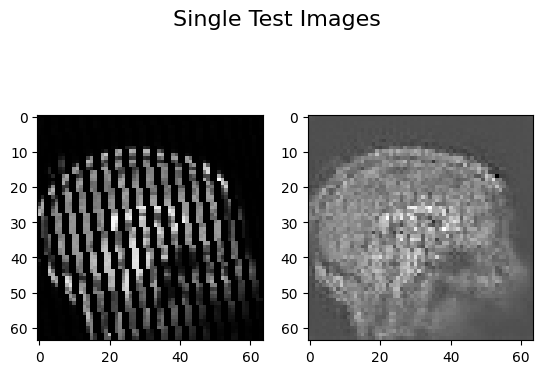

In [ ]:
model.eval()

inputs = next(iter(test_loader))[0]
valid_target = model(inputs.to(device))

valid_target = model(inputs.to(device))
# print(valid_target.squeeze(0).squeeze(0).shape)
# print(valid_target.shape)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(inputs[2].squeeze(0).cpu(), cmap="gray")
axs[1].imshow(valid_target[2].squeeze(0).cpu().detach().numpy(), cmap="gray")
plt.suptitle("Single Test Images", fontsize=16, y=0.95)

plt.show()

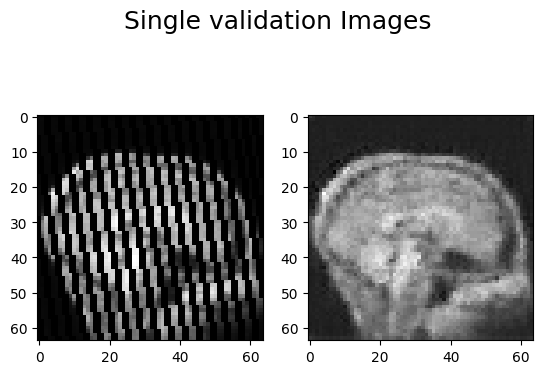

In [ ]:
model.eval()

inputs, target = next(iter(valid_loader_01))
valid_target = model(inputs.to(device))

valid_target = model(inputs.to(device))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(inputs[2].squeeze(0).cpu(), cmap="gray")
axs[1].imshow(valid_target[2].squeeze(0).cpu().detach().numpy(), cmap="gray")
plt.suptitle("Single validation Images", fontsize=18, y=0.95)

plt.show()

store data

In [ ]:
model.eval()
filled_images = []

# Disable gradient calculations (saves memory and speeds up inference)
with torch.no_grad():
    for inputs in test_loader:
        # Move the inputs to the appropriate device (e.g., GPU or CPU)
        inputs = inputs[0].to(device)

        outputs = model(inputs)
        outputs = outputs.cpu().numpy()
        print(outputs.shape)

        # Append the batch of outputs to the list
        filled_images.append(outputs)

# Concatenate all outputs into a single NumPy array
filled_images = np.concatenate(filled_images, axis=0)

# Save the processed images as a .npy file
file_save_name = 'test_set_nogaps.npy'
path = F"/content/gdrive/My Drive/generated_images/{file_save_name}"
np.save(path, filled_images)
print("Filled test set saved as 'test_set_nogaps.npy'")

(64, 1, 64, 64)
(36, 1, 64, 64)
Filled test set saved as 'test_set_nogaps.npy'


In [ ]:
print(filled_images)

[[[[ 0.06707306  0.04144824  0.01346259 ...  0.01008444  0.02784891
     0.04608527]
   [ 0.02543445  0.02663769  0.00517899 ...  0.01247944  0.03709125
     0.03695161]
   [ 0.00663663  0.00039642  0.00353075 ...  0.01795621  0.02062015
     0.01972158]
   ...
   [ 0.00872746  0.01774465  0.00024593 ...  0.00981004  0.02293911
     0.01410338]
   [ 0.03016648  0.0302331   0.00358644 ...  0.0143277   0.0224177
     0.03038165]
   [ 0.07749248  0.05231133  0.03471538 ...  0.0368045   0.05050437
     0.06178097]]]


 [[[ 0.07062055  0.0438459   0.01703004 ...  0.01168419  0.02947943
     0.04720799]
   [ 0.02928117  0.03224066  0.00543572 ...  0.01047393  0.03998762
     0.03737315]
   [ 0.01277983  0.00457367  0.01166185 ...  0.0199846   0.01902492
     0.02064649]
   ...
   [ 0.02194857  0.01950358  0.01539967 ...  0.00658938  0.02466139
     0.01422791]
   [ 0.03555718  0.03929697  0.01335068 ...  0.00883435  0.02269691
     0.0277334 ]
   [ 0.07787319  0.05597518  0.04251415 ...  0.0

In [ ]:
test_data_01 = np.load(path)
test_data_01.shape

(100, 1, 64, 64)

<Figure size 1000x1000 with 0 Axes>

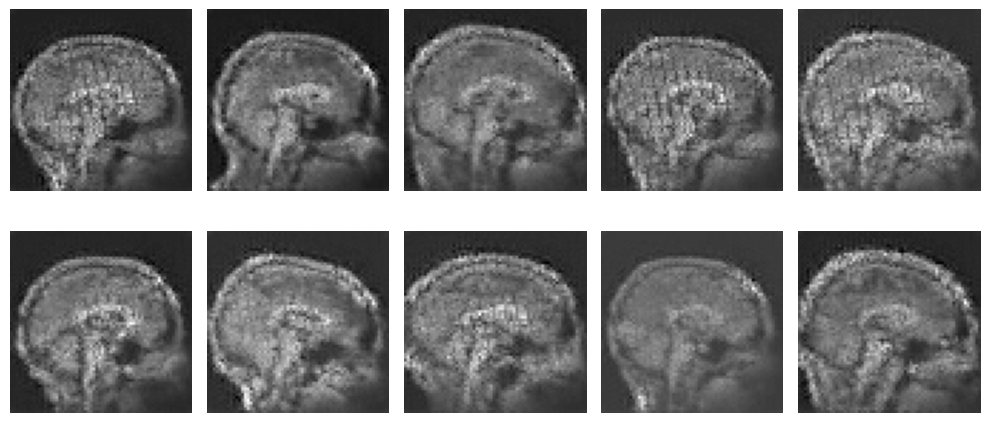

In [ ]:
# Display the test data
plt.figure(figsize=(10, 10))
fig, axs = plt.subplots(2, 5, figsize=(10, 5))

for i in range(10):
    axs[i // 5, i % 5].imshow(test_data_01[i, 0], cmap='gray')
    axs[i // 5, i % 5].axis('off')

plt.tight_layout()

Explanation

For my solution, I chose the U-Net model architecture due to its strong performance in image restoration tasks. The U-Net is well-suited for this problem because of its encoder-decoder structure with skip connections.

In terms of hyperparameters, I used the Adam optimizer with a learning rate of 1x10-4 and a batch size of 64. During experimentation, I tested different learning rates, including 1x10-3 and 1x10-5. I observed that 1x10-3 caused the loss to decrease too quickly, resulting in unstable training, while 1x10-5 led to blurred outputs.

Additionally, I experimented with L1(via dropout) and L2(via weight_decay) regularization to see if they could further improve the model's performance. However, both methods resulted in outputs that were more blurred, suggesting that regularization was overly constraining the model's ability to learn fine details.